In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
import matplotlib

### LABDOS 7E, 87
(136 keV +-35 keV) + CH * 71 keV
mean energy of the last channel in saturation: 14.36 MeV +-35 keV

### LABDOS 90
(60 keV +-15 keV) + CH * 30 keV
mean energy of the last channel in saturation: cca 8.8 MeV 


In [144]:
fto = '/storage/experiments/2023/02_italove/labdos1_TM_2211251240.txt' #  File to Open

l=[]
l.extend(range(0,257))
df = pd.read_csv(fto, sep=' ', header=None, names=l, comment='#', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn1 = df.loc[df[0]=='$DOS'].iloc[0,5]
print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200917056a000a000007e


In [107]:
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,$HIST,0,10,23010,0,0,22966.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,$HIST,1,20,23009,0,0,22974.0,17.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,$HIST,2,31,23009,0,0,22975.0,16.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,$HIST,3,41,23007,0,0,22979.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,$HIST,4,51,23009,0,0,22979.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,$HIST,180,1876,23030,5,0,22864.0,101.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
182,$HIST,181,1887,23023,4,0,22877.0,96.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
183,$HIST,182,1897,23016,7,0,22910.0,67.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184,$HIST,183,1907,23024,8,0,22881.0,87.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Counts per 10.4 seconds [-]')

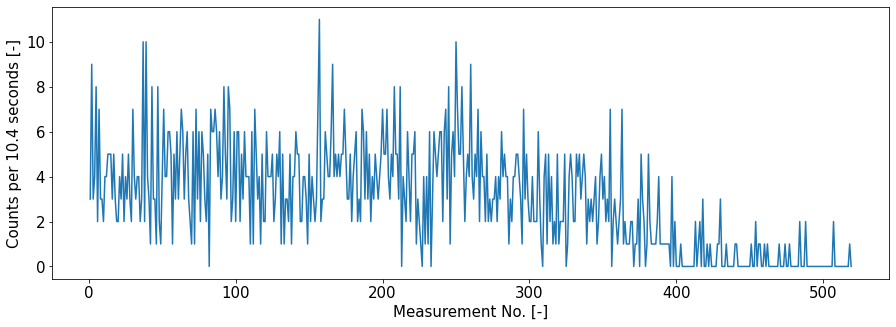

In [146]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])

plt.xlabel('Measurement No. [-]')
plt.ylabel('Counts per 10.4 seconds [-]')


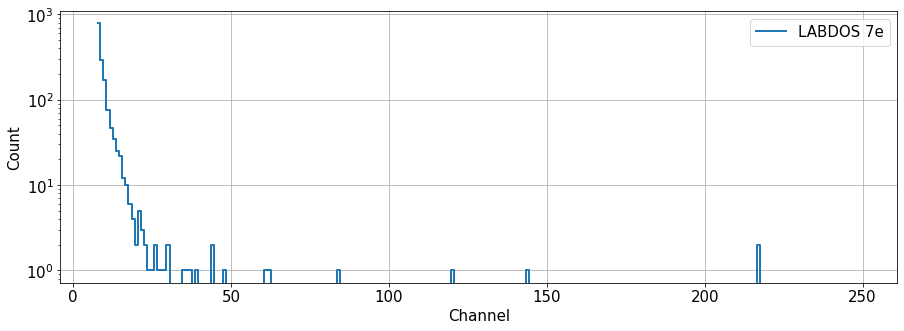

In [132]:
ener = df.iloc[:,FIRST_CHANNEL:250].sum()
#ener = df.iloc[0:round(3*24*60*60/10),FIRST_CHANNEL:250].sum()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='LABDOS '+sn1[-2:], lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()

In [5]:
int(df.iloc[-1,2])/60/60/24

16.457997685185184

0.171 0.071


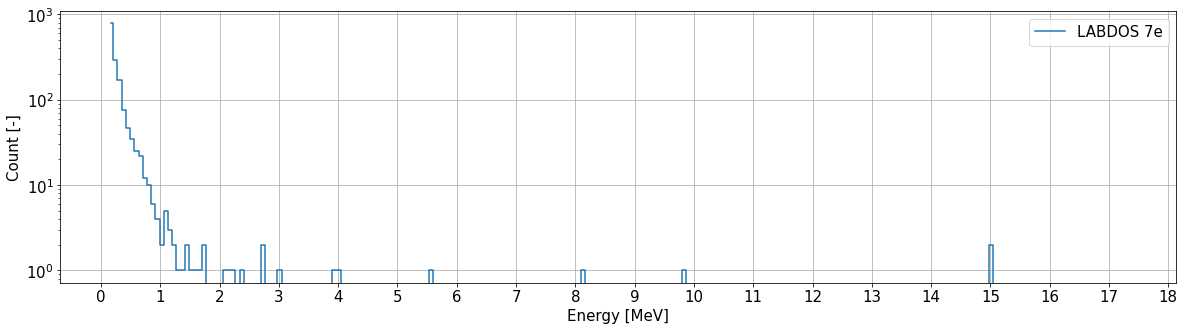

In [133]:
coef1 = np.array([0.,0.])
coef1[1] = 0.071
coef1[0] = 0.136 + 0.035

print (coef1[0], coef1[1])

e1 = pd.DataFrame()
e1['1'] = ener
e1['i'] = ener.index
e1['x'] = (e1['i'].astype(float)-FIRST_CHANNEL) * coef1[1] + coef1[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e1['x'], e1['1'] , label='LABDOS '+sn1[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
#plt.grid(visible=True, which='major', color='gray', linestyle='-')
#plt.grid(visible=True, axis='x', which='minor', color='lightgray', linestyle=':')
plt.legend()
plt.xticks(np.arange(0, 19, 1))
None

In [113]:
e1['ener'] = e1['1'] * e1['x']
print(round(e1['ener'].sum()/1000,2), 'GeV')
print(round(40931/3946, 2), 's')

0.49 GeV
10.37 s


In [134]:
# Deposited energy
df['ener'] = (np.asarray(df.iloc[:,8:249+1]) * np.asarray(e1['x'])).sum(axis=1)
# size of the chip (20 mm · 10 mm),
# the thickness of the depletion layer (0.3 mm),
# and the density of silicon (2.33 g cm^3)
# 0.1398e-3 kg
df['doserate'] = ((1e6 * (1.602e-19 * df['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 3  # in uGy/h

#    xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 2.45 * 1.048#* 1.1 #1.094#2.71 # in uGy/h


Text(0, 0.5, 'dH*(10)/dt or dE/dt [$\\mu$Sv/h]')

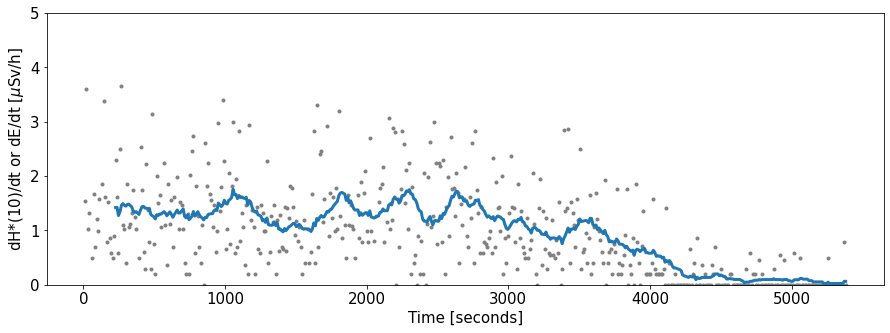

In [142]:
plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})



xx = df
xx[2] = pd.to_numeric(xx[2])
xx.set_index(2, drop=False, inplace=True)
xx = xx.loc[xx['doserate']<4].copy()
xx['doseratemean'] = xx['doserate'].rolling(20).mean()

plt.plot(xx['doserate'], marker='.', ls='', color='gray')
plt.plot(xx['doseratemean'], linewidth=3)

plt.ylim(0,5)

plt.xlabel('Time [seconds]')
plt.ylabel(r'dH*(10)/dt or dE/dt [$\mu$Sv/h]')

In [70]:
df[2]

1          10
2          20
3          31
4          41
5          51
        ...  
3943    40889
3944    40900
3945    40910
3946    40920
3947    40931
Name: 2, Length: 3947, dtype: int64

In [7]:
fto = '/storage/experiments/2022/10_labdos_italy/labdos2_TG_2210051139.txt' #  File to Open

l=[]
l.extend(range(0,257))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn2 = df.loc[df[0]=='$DOS'].iloc[0,5]
print("S.N.: ", sn2)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a200914056a000a0000087


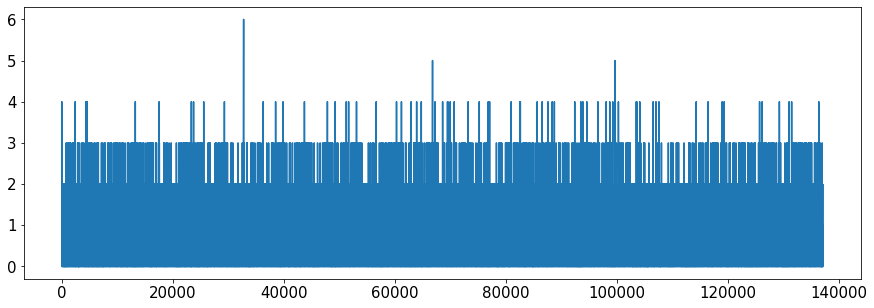

In [8]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])

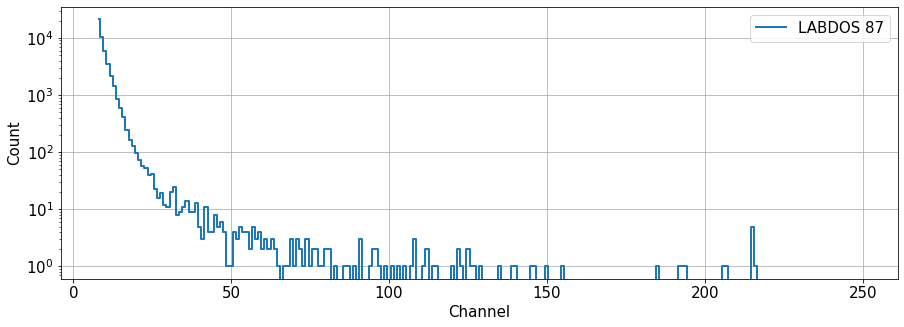

In [9]:
ener = df.iloc[:,FIRST_CHANNEL:250].sum()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='LABDOS '+sn2[-2:], lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()

0.171 0.071


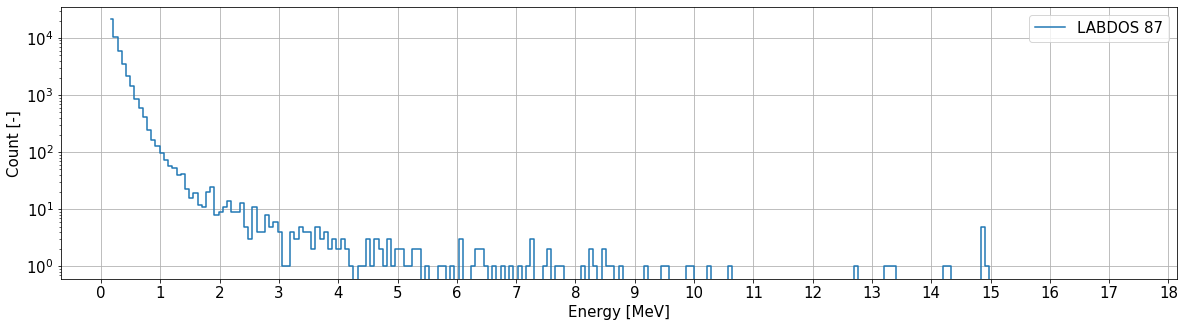

In [10]:
coef2 = np.array([0.,0.])
coef2[1] = 0.071
coef2[0] = 0.136 + 0.035


print (coef2[0], coef2[1])

e2 = pd.DataFrame()
e2['1'] = ener
e2['i'] = ener.index
e2['x'] = (e2['i'].astype(float)-FIRST_CHANNEL) * coef2[1] + coef2[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e2['x'], e2['1'] , label='LABDOS '+sn2[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
#plt.grid(visible=True, which='major', color='gray', linestyle='-')
#plt.grid(visible=True, axis='x', which='minor', color='lightgray', linestyle=':')
plt.legend()
plt.xticks(np.arange(0, 19, 1))
None

In [11]:
fto = '/storage/experiments/2022/10_labdos_italy/labdos3_TG_2210051138.txt' #  File to Open

l=[]
l.extend(range(0,505))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn3 = df.loc[df[0]=='$DOS'].iloc[0,5]
print("S.N.: ", sn3)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a20091a456a000a0000090


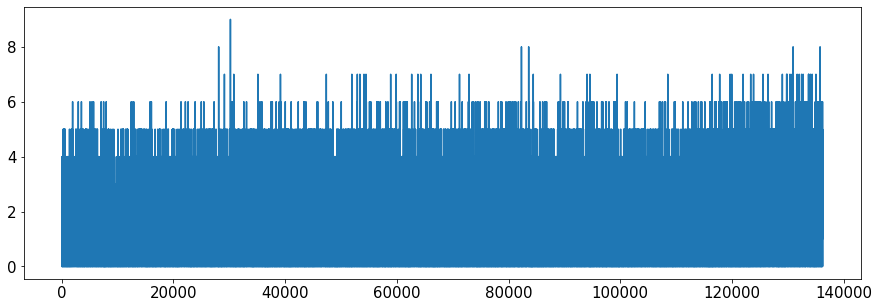

In [12]:
FIRST_CHANNEL = 9
df['sum'] = df.iloc[:,FIRST_CHANNEL:-1].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])

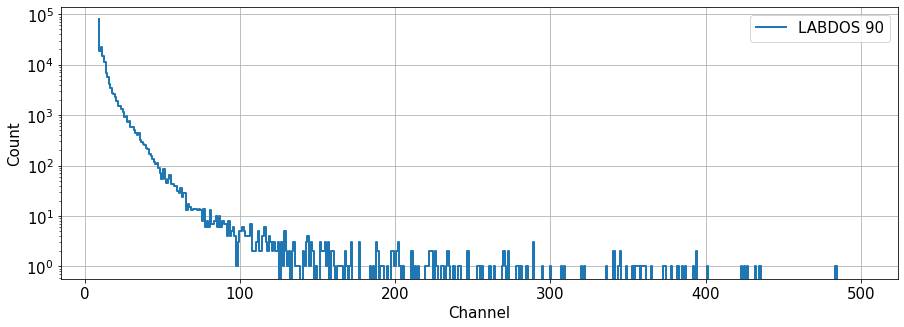

In [13]:
ener = df.iloc[:,FIRST_CHANNEL:500].sum()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')

plt.plot(ener, label='LABDOS '+sn3[-2:], lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Count')
plt.grid()

0.07 0.02


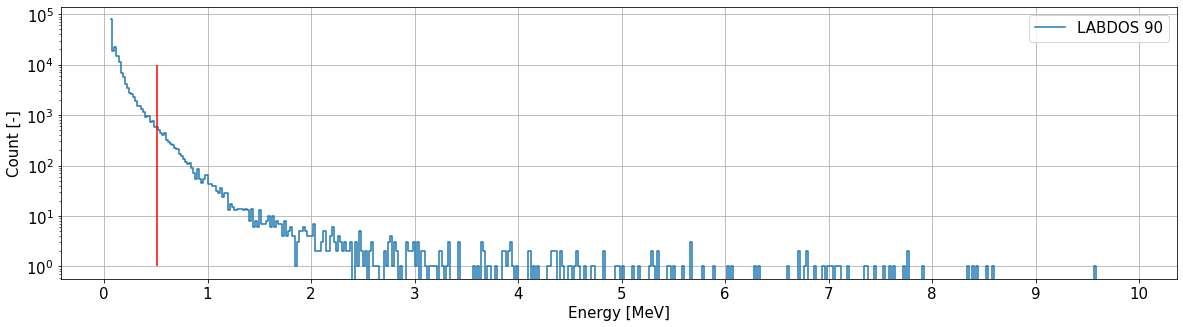

In [14]:
coef3 = np.array([0.,0.])
coef3[1] = 0.020
coef3[0] = 0.07
#coef[1] = 0.03
#coef[0] = 0.06

#(60 keV +-15 keV) + CH * 30 keV 

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 16, 1))
#plt.xlim(0,2)
plt.vlines(0.511,1,1e4, color='red')

None

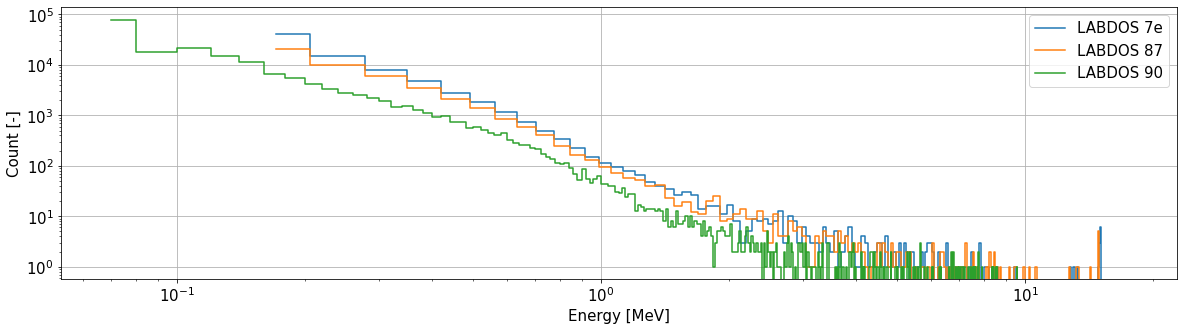

In [15]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e1['x'], e1['1'] , label='LABDOS '+sn1[-2:], drawstyle='steps-mid')
plt.plot(e2['x'], e2['1'] , label='LABDOS '+sn2[-2:], drawstyle='steps-mid')
plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 18, 1))
#plt.xlim(0,4)
None

# Liulin comparison

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy
import xml.etree.ElementTree as ET
from glob import glob
import datetime
%matplotlib inline

In [17]:
filename = '/storage/experiments/2022/10_labdos_italy/1901291336.y0R'

# extract time
path = filename.split('/')
time = path[-1].split('.')
print (time)
date_object = datetime.datetime.strptime(time[0], '%y%m%d%H%M')
print (date_object)

# read data
liulin = pd.read_csv(filename, header = None, sep = ' ', skiprows = 1) # read Liulin data Y
liulin = liulin.drop(256, axis=1) # delete last empty column
infile = open(filename, 'r')
header = infile.readline()
print (header) # print data header
#exposition = header.split(' ')[4].split('[')[0] # extract exposition time  
exposition = header.split()[3].split('[')[0] # Italian Liulin
exposition_val = float(exposition)
exposition += 'S'
print (exposition)

['1901291336', 'y0R']
2019-01-29 13:36:00
Liu-AR   EXPOSITION = 300[sec]

300S


(25799040.0, 25944480.0)

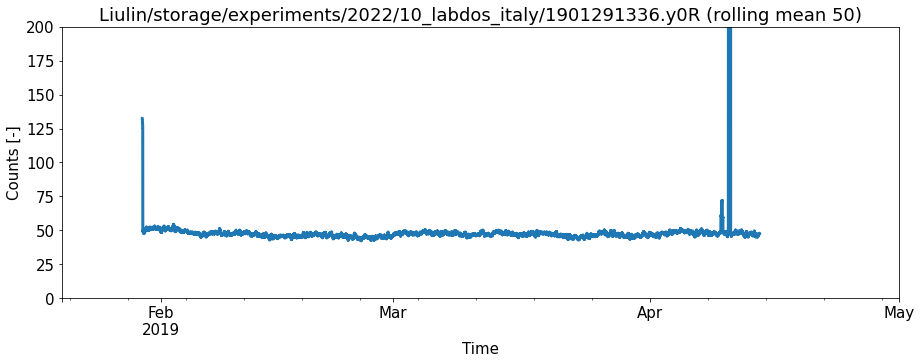

In [18]:
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.values)
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)

WINDOW = 50
liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()

#liulin_data
plt.figure(figsize=(15, 5))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps', linewidth=3)
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts [-]')
plt.xlabel('Time')
plt.ylim(0, 200)
plt.xlim('2019-01-20','2019-05')


(0.0, 200.0)

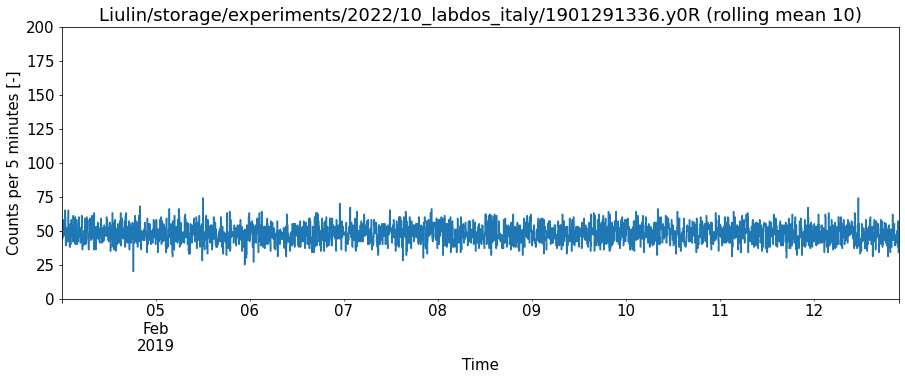

In [19]:
liulin_data = pd.DataFrame(index = pd.date_range(date_object, freq=exposition, periods=len(liulin)).tolist(), data = liulin.values)
liulin_data['flux'] = liulin_data[range(0,256)].sum(axis=1)
liulin_data = liulin_data.loc['2019-02-04 00:00:00':pd.to_datetime('2019-02-04 00:00:00')+ pd.DateOffset(days=8.9)]

#from datetime import timedelta

WINDOW = 10
#liulin_data['flux'] = liulin_data['flux'].rolling(WINDOW).mean()
liulin_data['flux'] = liulin_data['flux'] 

#liulin_data
plt.figure(figsize=(15, 5))
matplotlib.rcParams.update({'font.size': 15})
liulin_data['flux'].plot(drawstyle='steps')
plt.title('Liulin' + filename + ' (rolling mean ' + str(WINDOW) + ')')
plt.ylabel('Counts per 5 minutes [-]')
plt.xlabel('Time')
plt.ylim(0, 200)


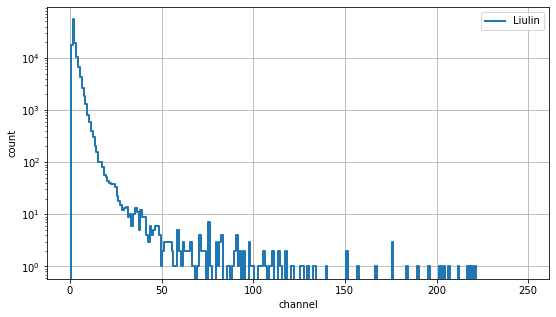

In [20]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 0

ener1 = liulin_data.iloc[:,LOW_ENERGY:250].sum()

plt.figure(figsize=(9,5))
plt.yscale('log')

plt.plot(ener1, label='Liulin', lw=2, drawstyle='steps-mid')
plt.legend()
plt.xlabel('channel')
plt.ylabel('count')
plt.grid()

#plt.xlim([10,150])



0.131 0.047


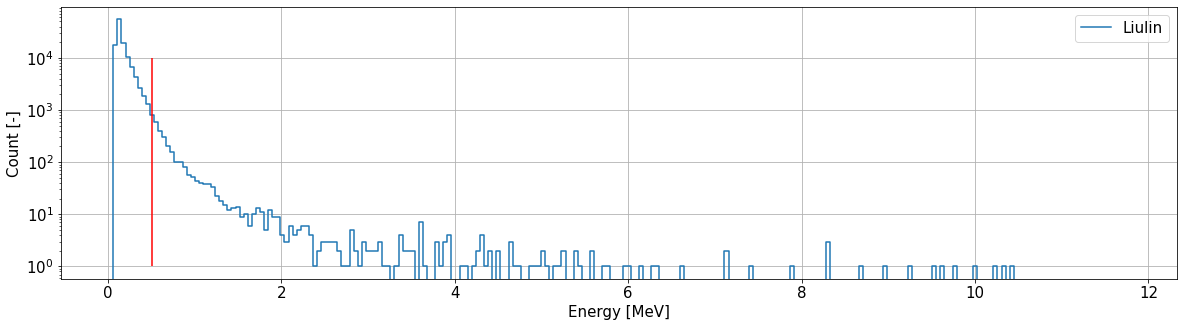

In [21]:
FIRST_CHANNEL = 2

coef4 = np.array([0.,0.])
coef4[1] = 0.047
coef4[0] = 0.131

print (coef4[0], coef4[1])

e4 = pd.DataFrame()
e4['1'] = ener1
e4['i'] = ener1.index
e4['x'] = (e4['i'].astype(float)-FIRST_CHANNEL) * coef4[1] + coef4[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e4['x'], e4['1'] , label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 16, 1))
#plt.xlim(0,2)
plt.vlines(0.511,1,1e4, color='red')

None

0.158 0.061


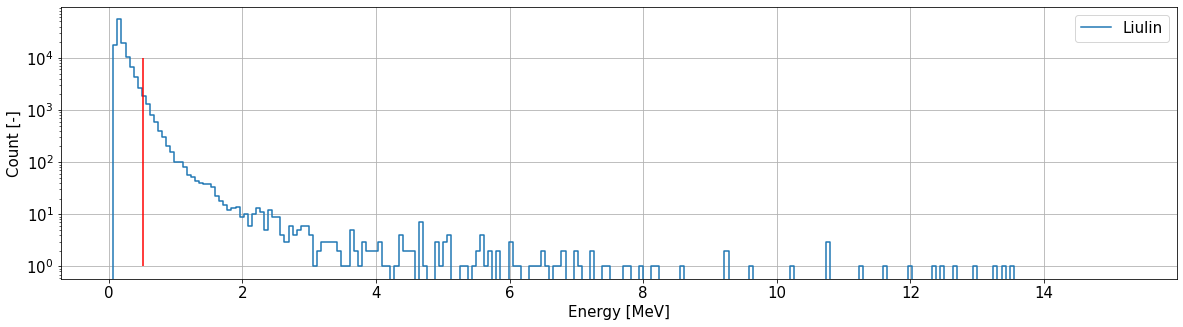

In [22]:
FIRST_CHANNEL = 2

coef5 = np.array([0.,0.])
coef5[1] = 0.061
coef5[0] = 0.158

print (coef5[0], coef5[1])

e5 = pd.DataFrame()
e5['1'] = ener1
e5['i'] = ener1.index
e5['x'] = (e5['i'].astype(float)-FIRST_CHANNEL) * coef5[1] + coef5[0]

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
#plt.xscale('log')

plt.plot(e5['x'], e5['1'] , label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Count [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 16, 1))
#plt.xlim(0,2)
plt.vlines(0.511,1,1e4, color='red')

None

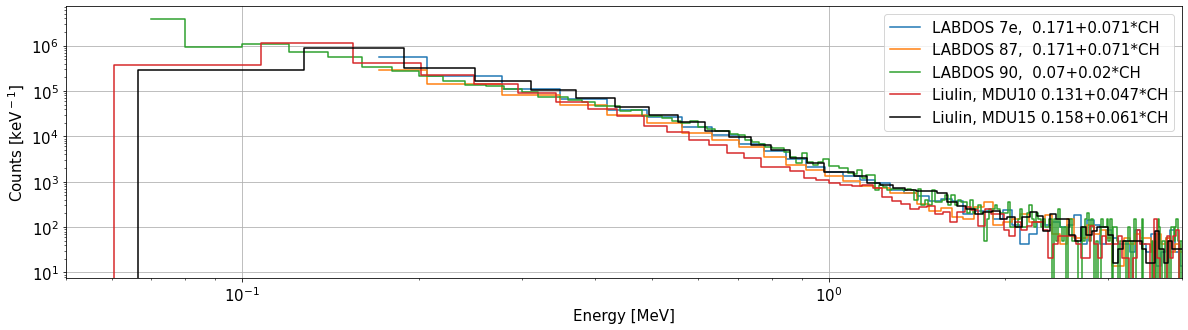

In [23]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e1['x'], e1['1']/coef1[1] , label='LABDOS '+sn1[-2:] + ',  ' + str(coef1[0]) + '+' + str(coef1[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e2['x'], e2['1']/coef2[1] , label='LABDOS '+sn2[-2:] + ',  ' + str(coef2[0]) + '+' + str(coef2[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e3['x'], e3['1']/coef3[1] , label='LABDOS '+sn3[-2:] + ',  ' + str(coef3[0]) + '+' + str(coef3[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e4['x'], e4['1']/coef4[1] , label='Liulin, MDU10 ' + str(coef4[0]) + '+' + str(coef4[1]) + '*CH', drawstyle='steps-mid')
plt.plot(e5['x'], e5['1']/coef5[1] , label='Liulin, MDU15 ' + str(coef5[0]) + '+' + str(coef5[1]) + '*CH', drawstyle='steps-mid', color='black')

plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [keV$^-$$^1$]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 18, 1))
plt.xlim(0.05,4)
None

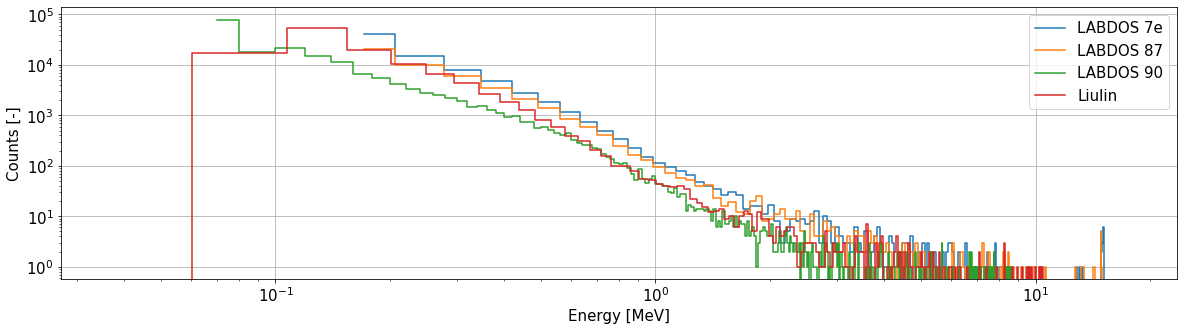

In [24]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})
plt.yscale('log')
plt.xscale('log')

plt.plot(e1['x'], e1['1'] , label='LABDOS '+sn1[-2:], drawstyle='steps-mid')
plt.plot(e2['x'], e2['1'] , label='LABDOS '+sn2[-2:], drawstyle='steps-mid')
plt.plot(e3['x'], e3['1'] , label='LABDOS '+sn3[-2:], drawstyle='steps-mid')
plt.plot(e4['x'], e4['1'] , label='Liulin', drawstyle='steps-mid')

plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.grid()
plt.legend()
#plt.xticks(np.arange(0, 18, 1))
#plt.xlim(0,4)
None

In [25]:
e5

,1,i,x
0,0,0,0.036
1,17542,1,0.097
2,54964,2,0.158
3,19368,3,0.219
4,10384,4,0.280
...,...,...,...
245,0,245,14.981
246,0,246,15.042
247,0,247,15.103
248,0,248,15.164
